# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import random
from config import api_key
import sys

#Import citipy for generation of random cities
from citipy import citipy

## Generate Cities List

In [3]:
#Create list of 500 random countries using citipy

# Latitude and longtitude max and min
latmin = -90
latmax = 90

longmin = -180
longmax = 180

# Set a count to get 500 cities and open empty list to add cities and countries
count = 0
cities = []

#Generate random latitude and longitude coordinates
while count < 600:
    lat = random.uniform(latmin, latmax)
    long = random.uniform(longmin, longmax)

#Find nearest city to those latitude and longitude values using citypy
    loc = citipy.nearest_city(lat, long)
    city = loc.city_name
    if city: 
        if city not in cities:
            cities.append(city)
            count = count + 1
        else:
            pass

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

# set up lists to hold reponse info
country = []
city_name = []
lat = []
long = []
temperature =[]
humidity =[]
cloudiness =[]
wind_speed =[]

count = 0
#Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        country.append(response['sys']['country'])
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        count = count + 1
        print(f"City Number {count} : {city} found! Appending data")
    
    except:
        print("City not found")
        pass

City Number 1 : kikwit found! Appending data
City Number 2 : tarko-sale found! Appending data
City Number 3 : mar del plata found! Appending data
City not found
City not found
City Number 4 : basco found! Appending data
City Number 5 : charleston found! Appending data
City Number 6 : carnarvon found! Appending data
City Number 7 : ponta do sol found! Appending data
City Number 8 : sinegorskiy found! Appending data
City Number 9 : jinchang found! Appending data
City Number 10 : farmington found! Appending data
City Number 11 : bengkulu found! Appending data
City Number 12 : hilo found! Appending data
City Number 13 : punta arenas found! Appending data
City Number 14 : nur found! Appending data
City Number 15 : banka found! Appending data
City Number 16 : tokmak found! Appending data
City Number 17 : san miguel found! Appending data
City Number 18 : kodiak found! Appending data
City Number 19 : bluff found! Appending data
City Number 20 : karratha found! Appending data
City Number 21 : u

City Number 166 : monrovia found! Appending data
City Number 167 : chuy found! Appending data
City Number 168 : majene found! Appending data
City Number 169 : ejea de los caballeros found! Appending data
City Number 170 : komsomolskiy found! Appending data
City Number 171 : hukuntsi found! Appending data
City Number 172 : cidreira found! Appending data
City Number 173 : muzhi found! Appending data
City Number 174 : inongo found! Appending data
City Number 175 : darhan found! Appending data
City Number 176 : pevek found! Appending data
City Number 177 : bonfim found! Appending data
City Number 178 : longyearbyen found! Appending data
City Number 179 : corralillo found! Appending data
City Number 180 : puerto el triunfo found! Appending data
City Number 181 : talcahuano found! Appending data
City not found
City Number 182 : pacific grove found! Appending data
City Number 183 : pundaguitan found! Appending data
City Number 184 : sychevka found! Appending data
City Number 185 : geraldton f

City Number 329 : goderich found! Appending data
City Number 330 : kukshi found! Appending data
City Number 331 : paita found! Appending data
City Number 332 : mersing found! Appending data
City not found
City Number 333 : pisco found! Appending data
City Number 334 : chapais found! Appending data
City Number 335 : oktyabrskiy found! Appending data
City Number 336 : caravelas found! Appending data
City Number 337 : ixtapa found! Appending data
City Number 338 : richards bay found! Appending data
City Number 339 : ekibastuz found! Appending data
City Number 340 : saint-augustin found! Appending data
City Number 341 : senanga found! Appending data
City Number 342 : ingleside found! Appending data
City not found
City Number 343 : chandbali found! Appending data
City Number 344 : zarubino found! Appending data
City Number 345 : verkhnevilyuysk found! Appending data
City Number 346 : hwange found! Appending data
City Number 347 : alexandria found! Appending data
City Number 348 : san rafael

City Number 490 : migori found! Appending data
City Number 491 : messini found! Appending data
City not found
City Number 492 : plock found! Appending data
City Number 493 : vereshchagino found! Appending data
City Number 494 : reforma found! Appending data
City Number 495 : great bend found! Appending data
City Number 496 : nador found! Appending data
City Number 497 : sawtell found! Appending data
City Number 498 : yeppoon found! Appending data
City Number 499 : novoagansk found! Appending data
City Number 500 : olafsvik found! Appending data
City Number 501 : les cayes found! Appending data
City not found
City Number 502 : iwanai found! Appending data
City Number 503 : kothapet found! Appending data
City not found
City Number 504 : rubiataba found! Appending data
City Number 505 : makaha found! Appending data
City Number 506 : calama found! Appending data
City not found
City Number 507 : magistralnyy found! Appending data
City Number 508 : vanavara found! Appending data
City Number 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create Dataframe
city_data = pd.DataFrame({
    'Country' : country,
    'City': city_name,
    'Longitude' : long,
    'Latitude': lat,
    'Temperature(F)': temperature, 
    'Humidity(%)': humidity,
    'Cloudiness(%)': cloudiness,
    'Wind_Speed(mph)': wind_speed
})

city_data.to_csv('output_data/export_city_df.csv', index=False)
city_data.head(5)

,Country,City,Longitude,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind_Speed(mph)
0,CD,Kikwit,18.82,-5.04,72.70,88,85,1.25
1,RU,Tarko-Sale,77.78,64.92,39.99,86,98,7.76
2,AR,Mar del Plata,-57.56,-38.00,64.40,59,50,8.05
3,PH,Basco,121.97,20.45,81.28,82,92,13.78
4,US,Charleston,-79.93,32.78,64.40,100,90,4.70


In [7]:
city_data.describe()

,Longitude,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind_Speed(mph)
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,15.820036,20.088650,63.137536,73.091241,51.781022,7.728467
std,89.061066,33.149744,16.175302,20.171270,37.936147,5.374048
min,-175.200000,-54.800000,14.290000,7.000000,0.000000,0.090000
25%,-60.367500,-8.237500,51.302500,64.000000,13.000000,3.485000
50%,21.765000,25.130000,65.120000,78.000000,62.500000,6.630000
75%,91.730000,48.422500,77.000000,88.000000,90.000000,10.290000
max,179.320000,78.220000,99.280000,100.000000,100.000000,31.090000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_data[city_data["Humidity(%)"] > 100]

,Country,City,Longitude,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind_Speed(mph)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

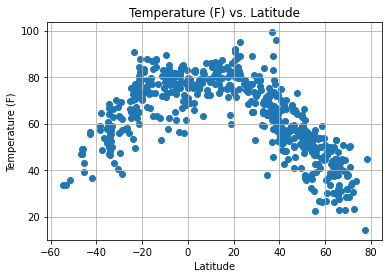

<Figure size 432x288 with 0 Axes>

In [39]:
# Temperature (F) vs. Latitude scatter plot
plt.scatter(city_data["Latitude"], city_data["Temperature(F)"], marker="o")

#Label plot
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig('output_data/Fig1.png')
#Scatter plot analyses the relationship between Temperature and Latitude 

## Latitude vs. Humidity Plot

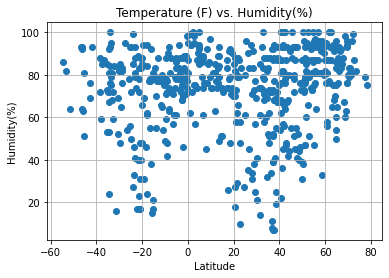

<Figure size 432x288 with 0 Axes>

In [40]:
# Humidity (%) vs. Latitude scatter plot
plt.scatter(city_data["Latitude"], city_data["Humidity(%)"], marker="o")

#Label plot
plt.title("Temperature (F) vs. Humidity(%)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig('output_data/Fig2.png')
#Scatter plot analyses the relationship between Humidity and Latitude 

## Latitude vs. Cloudiness Plot

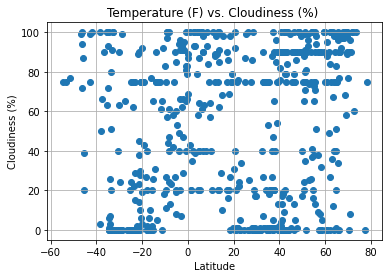

<Figure size 432x288 with 0 Axes>

In [41]:
# Cloudiness (%)  vs. Latitude scatter plot
plt.scatter(city_data["Latitude"], city_data["Cloudiness(%)"], marker="o")

#Label plot
plt.title("Temperature (F) vs. Cloudiness (%) ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig('output_data/Fig3.png')
#Scatter plot analyses the relationship between Cloudiness and Latitude 

## Latitude vs. Wind Speed Plot

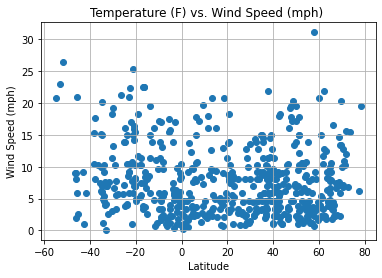

<Figure size 432x288 with 0 Axes>

In [42]:
# Wind Speed (mph)  vs. Latitude scatter plot
plt.scatter(city_data["Latitude"], city_data["Wind_Speed(mph)"], marker="o")

#Label plot
plt.title("Temperature (F) vs. Wind Speed (mph) ")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig('output_data/Fig4.png')
#Scatter plot analyses the relationship between Wind Speed and Latitude 

## Linear Regression

In [13]:
#Create Nothern and Southern Hemisphere Dataframes
north_city_data = city_data[city_data["Latitude"]>=0].reset_index(drop = True)
north_city_data.to_csv('export_northcity_df.csv', index=False)

south_city_data = city_data[city_data["Latitude"]<0].reset_index(drop = True)
south_city_data.to_csv('export_southcity_df.csv', index=False)

south_city_data.head()

,Country,City,Longitude,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind_Speed(mph)
0,CD,Kikwit,18.82,-5.04,72.70,88,85,1.25
1,AR,Mar del Plata,-57.56,-38.00,64.40,59,50,8.05
2,AU,Carnarvon,113.63,-24.87,62.60,72,0,16.11
3,ID,Bengkulu,102.27,-3.80,76.23,83,94,6.58
4,CL,Punta Arenas,-70.92,-53.15,33.40,82,75,23.04


In [43]:
#Create function to run regression lines

def regress(x,y):
    x_label = x.columns[0]
    x = x[x_label]
    
    y_label = y.columns[0]
    y = y[y_label]
    #Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

    # Get regression values
    regress_values = x * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #Label Axis
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq, ((max(x)/1.6), (max(y)/1.5)),fontsize=15,color="red")

    # Create Plot
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")

    # Print r value
    print(f"The r-value is: {rvalue}")
    print(f"The r-value squared is: {rvalue*rvalue}")

    # Show plot
    plt.show()
    
    return;

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8429924107547171
The r-value squared is: 0.7106362045900496


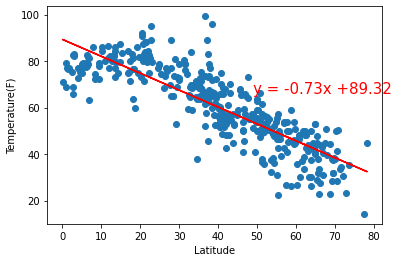

In [44]:
regress(north_city_data[["Latitude"]],north_city_data[["Temperature(F)"]])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7168015065996067
The r-value squared is: 0.513804399863466


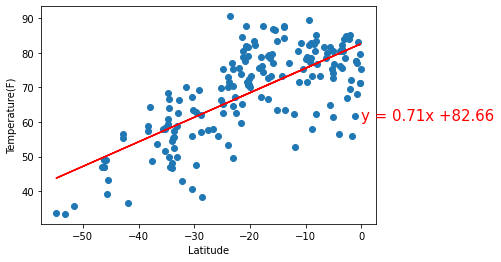

In [45]:
regress(south_city_data[["Latitude"]],south_city_data[["Temperature(F)"]])

#The r-value for both demonstrates that there is a strong correlation between latitude and temperature.
#The correlation is stronger in the Northern Hemisphere than the Southern 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10811068774217297
The r-value squared is: 0.011687920804085629


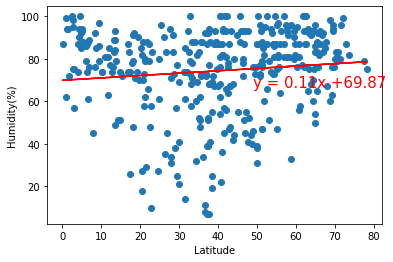

In [46]:
regress(north_city_data[["Latitude"]],north_city_data[["Humidity(%)"]])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.030792405495152365
The r-value squared is: 0.0009481722361778896


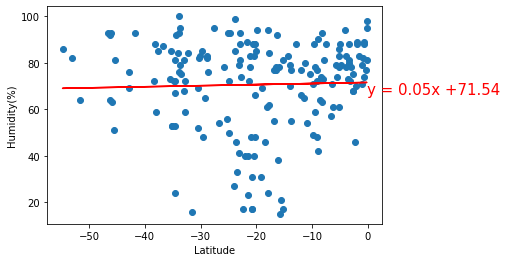

In [47]:
regress(south_city_data[["Latitude"]],south_city_data[["Humidity(%)"]])

#The r-value for both demonstrates that there is a very weak correlation between latitude and humidity.
#The correlation is stronger in the Northern Hemisphere than the Southern 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11576272051320251
The r-value squared is: 0.013401007460617837


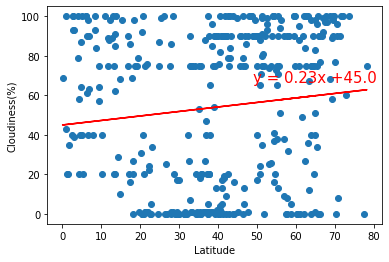

In [48]:
regress(north_city_data[["Latitude"]],north_city_data[["Cloudiness(%)"]])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05977126277638638
The r-value squared is: 0.003572603853883832


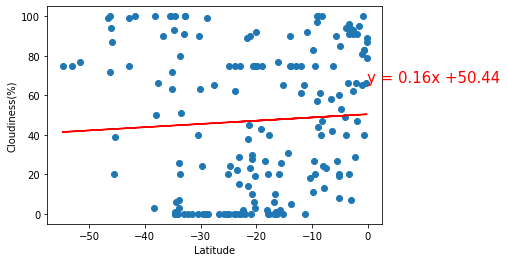

In [49]:
regress(south_city_data[["Latitude"]],south_city_data[["Cloudiness(%)"]])
#The r-value for both demonstrates that there is a very weak correlation between latitude and cloudiness.
#The correlation is stronger in the Northern Hemisphere than the Southern 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06265111822914027
The r-value squared is: 0.003925162615361712


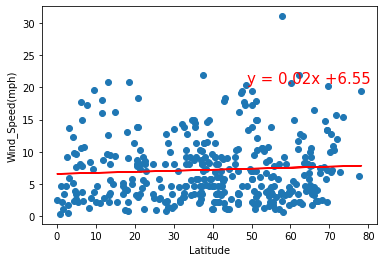

In [50]:
regress(north_city_data[["Latitude"]],north_city_data[["Wind_Speed(mph)"]])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.23302743932694953
The r-value squared is: 0.054301787479275145


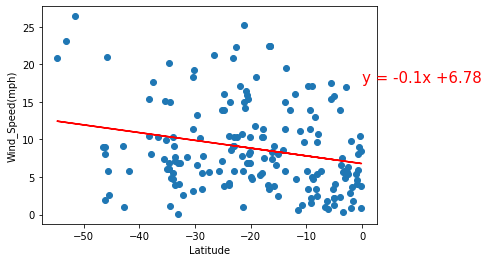

In [51]:
regress(south_city_data[["Latitude"]],south_city_data[["Wind_Speed(mph)"]])

#The r-value for both demonstrates that there is a very weak positive correlation in the northern hemisphere 
# and a very weak negative correlation in the southern hemisphere between latitude and wind speed.
#The correlation is stronger in the Southern Hemisphere than the Northern 